In [1]:
import pandas as pd


In [8]:
df = pd.read_csv("reuters.csv")

In [9]:
df.head()

,headline_text,category
0,Southern European bond yields hit multi-week lows,3
1,BRIEF-LG sells its entire stake in unit LG Lif...,6
2,BRIEF-Golden Wheel Tiandi says unit confirms s...,3
3,BRIEF-Sunshine 100 China Holdings Dec contract...,3
4,Euro zone stocks start 2017 with new one-year ...,3


Text(0.5,1,'News Headlines Category')

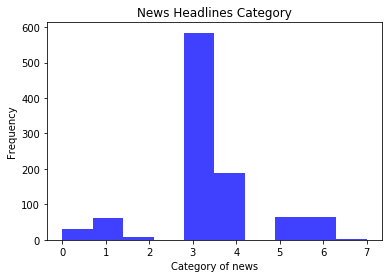

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['category'],facecolor='blue',alpha=0.75)
plt.xlabel("Category of news")
plt.ylabel("Frequency")
plt.title("News Headlines Category")

In [10]:
df.isnull().sum()

headline_text    0
category         0
dtype: int64

In [11]:
' ' in df['headline_text']

False

In [12]:
X = df['headline_text']
Y = df['category']

In [13]:
#splitting of data into train and test data
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 1234)

In [15]:
X_train.shape,X_test.shape

((749,), (250,))

In [21]:
# Building a pipeline for text classification

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
tfid = TfidfVectorizer()
nb_model = MultinomialNB()

In [28]:
txt_clf_nb = Pipeline([('tfid',TfidfVectorizer()),('nb_model',MultinomialNB())])

In [29]:
txt_clf_nb.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...        vocabulary=None)), ('nb_model', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
y_pred_nb = txt_clf_nb.predict(X_test)

Text(0.5,1,'Predicted Categories - Naive Bayes Model')

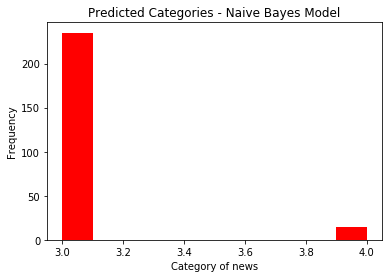

In [61]:
plt.hist(y_pred_nb,facecolor='red')
plt.xlabel("Category of news")
plt.ylabel("Frequency")
plt.title("Predicted Categories - Naive Bayes Model")

In [31]:
# checking the classification report , confusion matrix and accuracy of predicted and actual results

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [33]:
print(confusion_matrix(Y_test,y_pred_nb))

[[  0   0   0   6   0   0   0]
 [  0   0   0  17   0   0   0]
 [  0   0   0   1   0   0   0]
 [  0   0   0 154   0   0   0]
 [  0   0   0  32  15   0   0]
 [  0   0   0  10   0   0   0]
 [  0   0   0  15   0   0   0]]


In [36]:
import seaborn as sb

In [34]:
print(classification_report(Y_test,y_pred_nb))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         6
          1       0.00      0.00      0.00        17
          2       0.00      0.00      0.00         1
          3       0.66      1.00      0.79       154
          4       1.00      0.32      0.48        47
          5       0.00      0.00      0.00        10
          6       0.00      0.00      0.00        15

avg / total       0.59      0.68      0.58       250



C:\Users\smrithi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
print(accuracy_score(Y_test,y_pred_nb))

0.676


In [38]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [39]:
txt_clf_svc = Pipeline([('tfid',TfidfVectorizer()),('svc',LinearSVC())])
txt_clf_svc.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('tfid', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [40]:
y_pred_svc = txt_clf_svc.predict(X_test)

Text(0.5,1,'Predicted Categories -  LinearSupportVector Model')

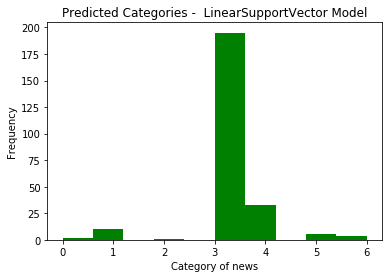

In [62]:
plt.hist(y_pred_svc,facecolor='green')
plt.xlabel("Category of news")
plt.ylabel("Frequency")
plt.title("Predicted Categories -  LinearSupportVector Model")

In [41]:
print(confusion_matrix(Y_test,y_pred_svc))

[[  2   0   0   1   3   0   0]
 [  0   9   0   6   2   0   0]
 [  0   0   1   0   0   0   0]
 [  0   1   0 150   2   1   0]
 [  0   0   0  21  25   0   1]
 [  0   0   0   6   1   3   0]
 [  0   0   0  11   0   1   3]]


In [42]:
print(classification_report(Y_test,y_pred_svc))

             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       0.90      0.53      0.67        17
          2       1.00      1.00      1.00         1
          3       0.77      0.97      0.86       154
          4       0.76      0.53      0.62        47
          5       0.60      0.30      0.40        10
          6       0.75      0.20      0.32        15

avg / total       0.77      0.77      0.74       250



In [43]:
print(accuracy_score(Y_test,y_pred_svc))

0.772
